In [1]:
# import analysis library
import pandas as pd, numpy as np 
import seaborn  as sns
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
plt.style.use('ggplot')

from sklearn import linear_model

Populating the interactive namespace from numpy and matplotlib


## Task 1

In [87]:
df_task1 = pd.read_excel('Task1.xlsx')

In [91]:
df_task1 = df_task1.iloc[:,0:4]

In [148]:
#df_task1.Country.value_counts()

In [146]:
df1_pivot= pd.pivot_table(df_task1, 
               columns='Country',
               index='Group',
               values='Activity',
               aggfunc=mean)
df1_pivot

Country,Aunuu,Ofu,Olosega,Rose Atoll,Swains Island,Tau
Group,,,,,,
1,5829.182716,7561.050414,5063.383657,5881.919072,8442.280757,10103.217310
2,6664.437884,6687.219498,3957.284220,5845.440474,7541.721653,8899.961823
3,7287.017197,7753.075654,4286.907776,5731.718903,7598.855888,10966.406134
4,5968.798172,6498.516483,3943.333589,5627.067769,8387.255873,8968.217215
5,5619.389730,7218.902461,3689.836091,5068.195240,5143.777782,9352.273971


([<matplotlib.axis.XTick at 0x10e5c3da0>,
 <a list of 5 Text xticklabel objects>)

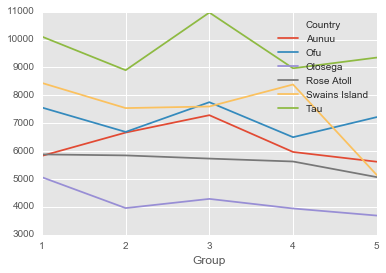

In [147]:
new_ticks = np.arange(1,6)
df1_pivot.plot()
plt.xticks(new_ticks)

### Observation
 - Group 3, and group 1 work well on most countries
 - Group 2 works worse than benchmark (group 5), need to dive deep 
 - Group 4 works a liitle bit worse than  benchmark, need to improve
 - Different campaiggns work similar in  some countries ( Rose Atoll, and  Olosega)


## Task 2

In [70]:
df_display = pd.read_excel('Task2.xlsx',sheetname=0)

In [71]:
df_promotions = pd.read_excel('Task2.xlsx',sheetname=1)

In [73]:
df_merge = df_display.merge(df_promotions, on='Date')
df_merge = df_merge.fillna('NA')

In [74]:
def weekday(x):
    if x== 0:
        return 'Monday'
    if x== 1 :
        return 'Tuesday'
    if x== 2 :
        return 'Wednesday'
    if x== 3 :
        return 'Thursday'
    if x== 4 :
        return 'Friday'
    if x== 5 :
        return 'Saturday'
    if x== 6 :
        return 'Sunday'


In [75]:
# The day of the week with Monday=0, Sunday=6

df_merge.loc[:, 'weekday'] = df_merge['Date'].dt.weekday
df_merge.loc[:, 'weekday_'] = df_merge['weekday'].map(lambda x: weekday(x) )


In [129]:
from sklearn.linear_model import LinearRegression

def linear_model(playercount,df,Promo,weekday):
    df_ = df.copy()
    df__ = df_[(df_.Promo ==Promo)&(df_.weekday_ ==weekday)]
    # aggregrate data 
    df__ = df__.groupby('Date').agg({'Playerid':'count', 'Revenue': 'sum'}).reset_index()
    df__.columns = ['date', 'players','revenue']
    # train with linear model  
    regr = LinearRegression()
    regr.fit(df__.iloc[:,1:2].values,df__.iloc[:,2:3].values)
    print (regr)
    # predict with linear model  
    predict = regr.predict(playercount)
    return predict
      

### a.

In [134]:
linear_model(3000,df_merge,'NA','Monday')

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


array([[ 554.65270593]])

In [135]:
linear_model(4000,df_merge,'A','Tuesday')

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


array([[ 807.61673678]])

In [136]:
linear_model(6000,df_merge,'A','Wednesday')

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


array([[ 700.8955393]])

In [137]:
linear_model(5000,df_merge,'B','Thursday')

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


array([[ 945.28668844]])

In [132]:
linear_model(6000,df_merge,'A','Friday')

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


array([[ 1243.2655368]])

In [138]:
linear_model(6000,df_merge,'B','Saturday')

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


array([[ 1277.17164676]])

In [139]:
linear_model(7000,df_merge,'NA','Sunday')

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


array([[ 1188.16020712]])

In [143]:
df_merge.groupby('Promo').mean()['Revenue']

Promo
A     7.539645
B     9.355138
NA    6.724565
Name: Revenue, dtype: float64

### b.
#### Promo B is better 
- (Promo B avg revenue 9.3 >  Promo A avg revenue 7.5 ) 

### c. d. 
#### Confidence, and Residual can be approached via statsmodels library,
- output should be something like this :


In [149]:
"""
OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Wed, 08 Mar 2017   Prob (F-statistic):           3.83e-62
Time:                        10:08:24   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.000     147.071     157.196
x1           -10.0122     59.749     -0.168      0.867    -127.448     107.424
x2          -239.8191     61.222     -3.917      0.000    -360.151    -119.488
x3           519.8398     66.534      7.813      0.000     389.069     650.610
x4           324.3904     65.422      4.958      0.000     195.805     452.976
x5          -792.1842    416.684     -1.901      0.058   -1611.169      26.801
x6           476.7458    339.035      1.406      0.160    -189.621    1143.113
x7           101.0446    212.533      0.475      0.635    -316.685     518.774
x8           177.0642    161.476      1.097      0.273    -140.313     494.442
x9           751.2793    171.902      4.370      0.000     413.409    1089.150
x10           67.6254     65.984      1.025      0.306     -62.065     197.316
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         227.
==============================================================================

"""

'\nOLS Regression Results                            \n==============================================================================\nDep. Variable:                      y   R-squared:                       0.518\nModel:                            OLS   Adj. R-squared:                  0.507\nMethod:                 Least Squares   F-statistic:                     46.27\nDate:                Wed, 08 Mar 2017   Prob (F-statistic):           3.83e-62\nTime:                        10:08:24   Log-Likelihood:                -2386.0\nNo. Observations:                 442   AIC:                             4794.\nDf Residuals:                     431   BIC:                             4839.\nDf Model:                          10                                         \nCovariance Type:            nonrobust                                         \n==============================================================================\n                 coef    std err          t      P>|t|      [0.02

## Task 3

VIP is the most value users to company, can use folllowing metrics 
target/seperate them from mass players.

-Metrics
    - Profit
        - Total pay amounts 
        - Total buy credits 
    - Recency
        - When user last pay 
        - When user last buy credits
        - When user last login
        - When user last open the APP
    - Frequency
        - How often user pay 
        - How often user buy credits
        - How often user login
        - How often user open the APP
    - Others 
        - Top weekly pay users 
        - User who bought some very expensive credicts/products 
        
- Data Prepare 
    - Profit : 
    Create user profile table, update total pay/buy amount 
    for every users every period 
    - Recency :
    Create user log table, tracking all user events: pay/buy/login/open APP
    - Frequency : Using SQL, query user log table above, can get the needed values
    
- Approach 
    - Using classfication models like KNN/Kmeans get factors from similar users then doiing further classifications 